In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [2]:
df = pd.read_csv('../data/FIFA22_official_data.csv', sep=',')
columns_to_drop = ['Photo','Club Logo', 'Real Face', 'Flag']
df = df.drop(columns=columns_to_drop)


In [3]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'],
      dtype='object')

In [4]:
'Name', 'Nationality', 'Club','Value', 'Wage', 'Preferred Foot',

('Name', 'Nationality', 'Club', 'Value', 'Wage', 'Preferred Foot')

In [5]:
import re

html_string = '<span class="pos pos16">LM'

# Define a regular expression pattern to match HTML tags
html_tags_pattern = re.compile(r'<.*?>')

# Use the sub() function to replace matched HTML tags with an empty string
text_without_tags = html_tags_pattern.sub('', html_string)

print(text_without_tags)


LM


In [6]:
df['Position'].unique()
# columns_to_keep_gk = ['Age','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Skill Moves','Overall']
# 

array(['<span class="pos pos18">CAM', '<span class="pos pos11">LDM',
       '<span class="pos pos24">RS', '<span class="pos pos13">RCM',
       '<span class="pos pos7">LB', '<span class="pos pos9">RDM',
       '<span class="pos pos15">LCM', '<span class="pos pos28">SUB',
       '<span class="pos pos26">LS', '<span class="pos pos12">RM',
       '<span class="pos pos6">LCB', '<span class="pos pos16">LM',
       '<span class="pos pos3">RB', '<span class="pos pos10">CDM',
       '<span class="pos pos23">RW', '<span class="pos pos27">LW',
       '<span class="pos pos25">ST', '<span class="pos pos14">CM',
       '<span class="pos pos20">RF', '<span class="pos pos8">LWB',
       '<span class="pos pos17">RAM', '<span class="pos pos21">CF',
       '<span class="pos pos29">RES', '<span class="pos pos22">LF',
       '<span class="pos pos2">RWB', '<span class="pos pos5">CB',
       '<span class="pos pos4">RCB', nan, '<span class="pos pos19">LAM',
       '<span class="pos pos0">GK'], dtype=object)

#### prepare data set for goal keepers only

In [7]:
df_goalkeeper = df.copy()

def clean_gk_column(string):
    html_string = '<span class="pos pos16">LM'

    # Define a regular expression pattern to match HTML tags
    html_tags_pattern = re.compile(r'<.*?>')

    # Use the sub() function to replace matched HTML tags with an empty string
    cleaned_string = html_tags_pattern.sub('', str(string))
    return cleaned_string

# clean Position column
df_goalkeeper['Position'] = df_goalkeeper['Position'].apply(clean_gk_column)
# select only goal keeper
df_goalkeeper = df_goalkeeper[df_goalkeeper['Position'] == 'GK']

# remove columns:
columns_to_keep_gk = ['Age','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Skill Moves','Reactions', 'Vision', 'Composure','LongPassing', 'Strength','Jumping', 'Overall',]

# handle naivly NaN's
df_goalkeeper = df_goalkeeper[columns_to_keep_gk]
df_goalkeeper.loc[df_goalkeeper['Composure'].isna(), 'Composure'] = df_goalkeeper['Composure'].median()
df_goalkeeper.loc[df_goalkeeper['Jumping'].isna(), 'Jumping'] = df_goalkeeper['Jumping'].median()
df_goalkeeper.loc[df_goalkeeper['Vision'].isna(), 'Vision'] = df_goalkeeper['Vision'].median()

display(df_goalkeeper)

,Age,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Skill Moves,Reactions,Vision,Composure,LongPassing,Strength,Jumping,Overall
10736,40,78.0,67.0,90.0,84.0,70.0,1.0,75.0,25.0,49.0,58.0,72.0,66.0,75
11192,27,87.0,82.0,93.0,88.0,88.0,1.0,88.0,70.0,70.0,66.0,78.0,66.0,89
12350,35,88.0,88.0,91.0,89.0,88.0,1.0,87.0,70.0,70.0,68.0,80.0,77.0,90
13109,27,83.0,78.0,87.0,80.0,86.0,1.0,80.0,69.0,65.0,56.0,70.0,77.0,83
13177,24,84.0,80.0,87.0,83.0,86.0,1.0,83.0,64.0,64.0,53.0,79.0,80.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16604,24,57.0,58.0,57.0,60.0,59.0,1.0,53.0,29.0,29.0,16.0,56.0,47.0,59
16651,18,60.0,57.0,59.0,57.0,59.0,1.0,52.0,22.0,26.0,16.0,58.0,33.0,59
16661,18,59.0,54.0,52.0,49.0,61.0,1.0,48.0,26.0,30.0,19.0,55.0,42.0,56
16670,22,61.0,59.0,57.0,58.0,59.0,1.0,45.0,25.0,36.0,20.0,60.0,33.0,59


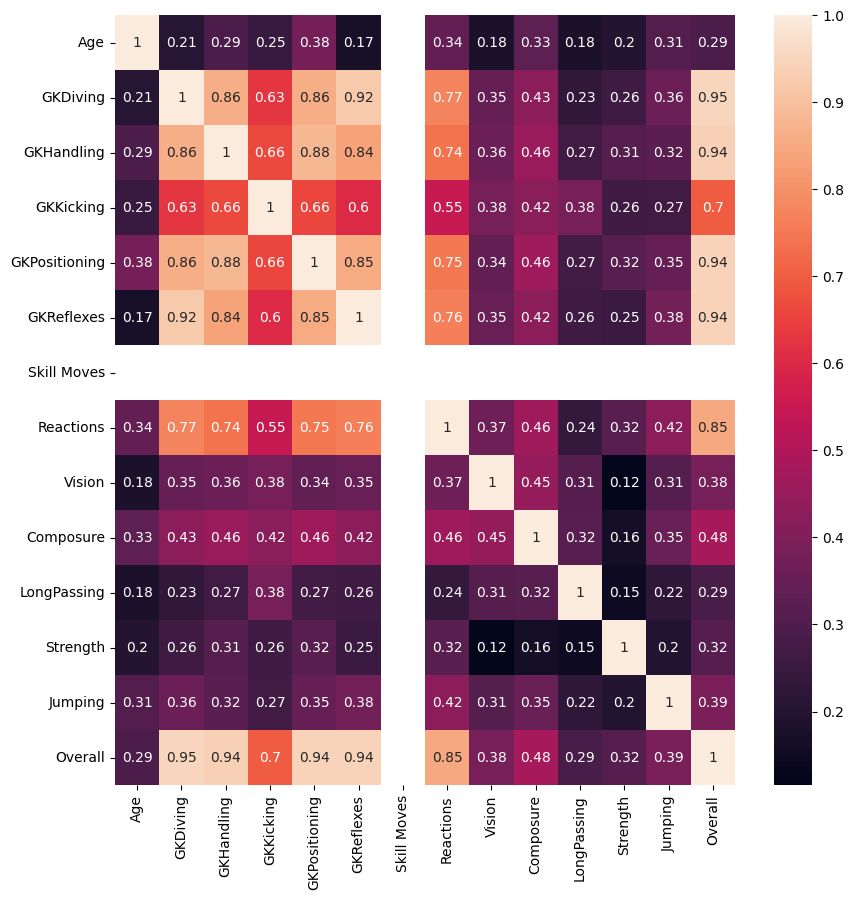

In [10]:
corr_matrix = df_goalkeeper.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to search through
param_dist = {
    'n_neighbors': randint(1, 50),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}


# Randomized Search CV
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=1)
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (accuracy):", best_score)

# Evaluate the model on the test set using the best parameters
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Score (accuracy): 0.9583333333333334
Test Set Accuracy: 1.0


In [31]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target variable
one_hot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_one_hot = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Reshape the data for LSTM input (samples, time steps, features)
time_steps = 1  # We treat each sample as a single time step
X_train_lstm = X_train.reshape(X_train.shape[0], time_steps, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], time_steps, X_test.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(10, input_shape=(time_steps, X_train.shape[1])))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=8, validation_split=0.1)

# Evaluate the model on the test set
accuracy = model.evaluate(X_test_lstm, y_test)[1]
print("Test Accuracy:", accuracy)


/Users/alexanderlorenz/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
14/14 [==============================] - 3s 56ms/step - loss: 1.1261 - accuracy: 0.3148 - val_loss: 1.0865 - val_accuracy: 0.4167
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 1.0951 - accuracy: 0.3148 - val_loss: 1.0651 - val_accuracy: 0.4167
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 1.0649 - accuracy: 0.3148 - val_loss: 1.0447 - val_accuracy: 0.4167
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 1.0329 - accuracy: 0.3611 - val_loss: 1.0228 - val_accuracy: 0.5000
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 1.0006 - accuracy: 0.6204 - val_loss: 0.9993 - val_accuracy: 0.5833
Epoch 6/50
14/14 [==============================] - 0s 5ms/step - loss: 0.9675 - accuracy: 0.6574 - val_loss: 0.9742 - val_accuracy: 0.5833
Epoch 7/50
14/14 [==============================] - 0s 6ms/step - loss: 0.9336 - accuracy: 0.6667 - val_loss: 0.9465 - val_accuracy: 0.5833
Epoch 8/50
14/14 [=